<a href="https://colab.research.google.com/github/nhatminhnb123/PythonAssignment/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Thêm các gói thư viện**

In [ ]:
!pip install chart_studio

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# **Tải dữ liệu**

In [ ]:
sales = pd.read_csv('https://media.githubusercontent.com/media/minhhieu9800/Python-MSE/main/Data/train.csv')

# **Tiền xử lý dữ liệu**

Kiểm tra dữ liệu

In [ ]:
sales.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
8626,8627,CA-2016-164084,07/09/2016,12/09/2016,Standard Class,AG-10525,Andy Gerbode,Corporate,United States,New York City,New York,10011.0,East,OFF-ST-10003638,Office Supplies,Storage,Mobile Personal File Cube,70.260
9394,9395,CA-2015-125997,20/09/2015,23/09/2015,First Class,MW-18220,Mitch Webber,Consumer,United States,New York City,New York,10011.0,East,FUR-CH-10001394,Furniture,Chairs,Global Leather Executive Chair,631.782
7374,7375,US-2018-123862,07/01/2018,09/01/2018,Second Class,JF-15190,Jamie Frazer,Consumer,United States,Long Beach,California,90805.0,West,OFF-FA-10003112,Office Supplies,Fasteners,Staples,7.890
1094,1095,CA-2016-165085,27/12/2016,31/12/2016,Standard Class,BT-11485,Brad Thomas,Home Office,United States,Clinton,Maryland,20735.0,East,OFF-AP-10002518,Office Supplies,Appliances,Kensington 7 Outlet MasterPiece Power Center,355.960
9189,9190,US-2016-130512,21/08/2016,25/08/2016,Standard Class,SM-20320,Sean Miller,Home Office,United States,Allentown,Pennsylvania,18103.0,East,OFF-ST-10002574,Office Supplies,Storage,"SAFCO Commercial Wire Shelving, Black",663.072
1903,1904,CA-2018-167094,21/10/2018,22/10/2018,First Class,DK-12835,Damala Kotsonis,Corporate,United States,Springfield,Oregon,97477.0,West,FUR-CH-10000155,Furniture,Chairs,Global Comet Stacking Armless Chair,478.480
6305,6306,CA-2017-163328,04/11/2017,06/11/2017,Second Class,TP-21565,Tracy Poddar,Corporate,United States,Eugene,Oregon,97405.0,West,OFF-SU-10002301,Office Supplies,Supplies,Serrated Blade or Curved Handle Hand Letter Op...,17.584
2306,2307,CA-2016-160794,06/08/2016,08/08/2016,First Class,MS-17980,Michael Stewart,Corporate,United States,Houston,Texas,77041.0,Central,OFF-PA-10004156,Office Supplies,Paper,Xerox 188,27.216
4368,4369,CA-2018-117044,11/09/2018,13/09/2018,Second Class,HA-14920,Helen Andreada,Consumer,United States,Chicago,Illinois,60623.0,Central,OFF-PA-10003657,Office Supplies,Paper,Xerox 1927,20.544
1375,1376,CA-2015-126361,04/08/2015,09/08/2015,Second Class,VD-21670,Valerie Dominguez,Consumer,United States,Pleasant Grove,Utah,84062.0,West,OFF-AP-10003590,Office Supplies,Appliances,Hoover WindTunnel Plus Canister Vacuum,1089.750


In [ ]:
sales.shape

(9800, 18)

In [ ]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9800.0,4900.500000,2829.160653,1.000,2450.750,4900.50,7350.250,9800.00
Postal Code,9789.0,55273.322403,32041.223413,1040.000,23223.000,58103.00,90008.000,99301.00
Sales,9800.0,230.769059,626.651875,0.444,17.248,54.49,210.605,22638.48


**Xử lý dữ liệu thiếu**

In [ ]:
sales.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [ ]:
sales.dropna(inplace = True)
sales.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

**Chuẩn hóa ngày tháng**

In [ ]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'],format='%d/%m/%Y')
sales['Ship Date'] = pd.to_datetime(sales['Ship Date'],format='%d/%m/%Y')
sales['Year Month'] = sales['Order Date'].apply(lambda x: x.strftime('%Y-%m'))

In [ ]:
sales_trend = pd.DataFrame(sales.groupby('Year Month').sum()['Sales'].reset_index())

sales_trend['quarter'] = pd.PeriodIndex(sales_trend['Year Month'], freq='Q')
sales_trend

,Year Month,Sales,quarter
0,2015-01,14205.7070,2015Q1
1,2015-02,4519.8920,2015Q1
2,2015-03,55205.7970,2015Q1
3,2015-04,27906.8550,2015Q2
4,2015-05,23644.3030,2015Q2
5,2015-06,34322.9356,2015Q2
6,2015-07,33781.5430,2015Q3
7,2015-08,27117.5365,2015Q3
8,2015-09,81623.5268,2015Q3
9,2015-10,31453.3930,2015Q4


In [ ]:
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year Month
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017-11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-06
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-10
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016-10


# **Biểu đồ thể hiện biến động doanh số theo tháng**

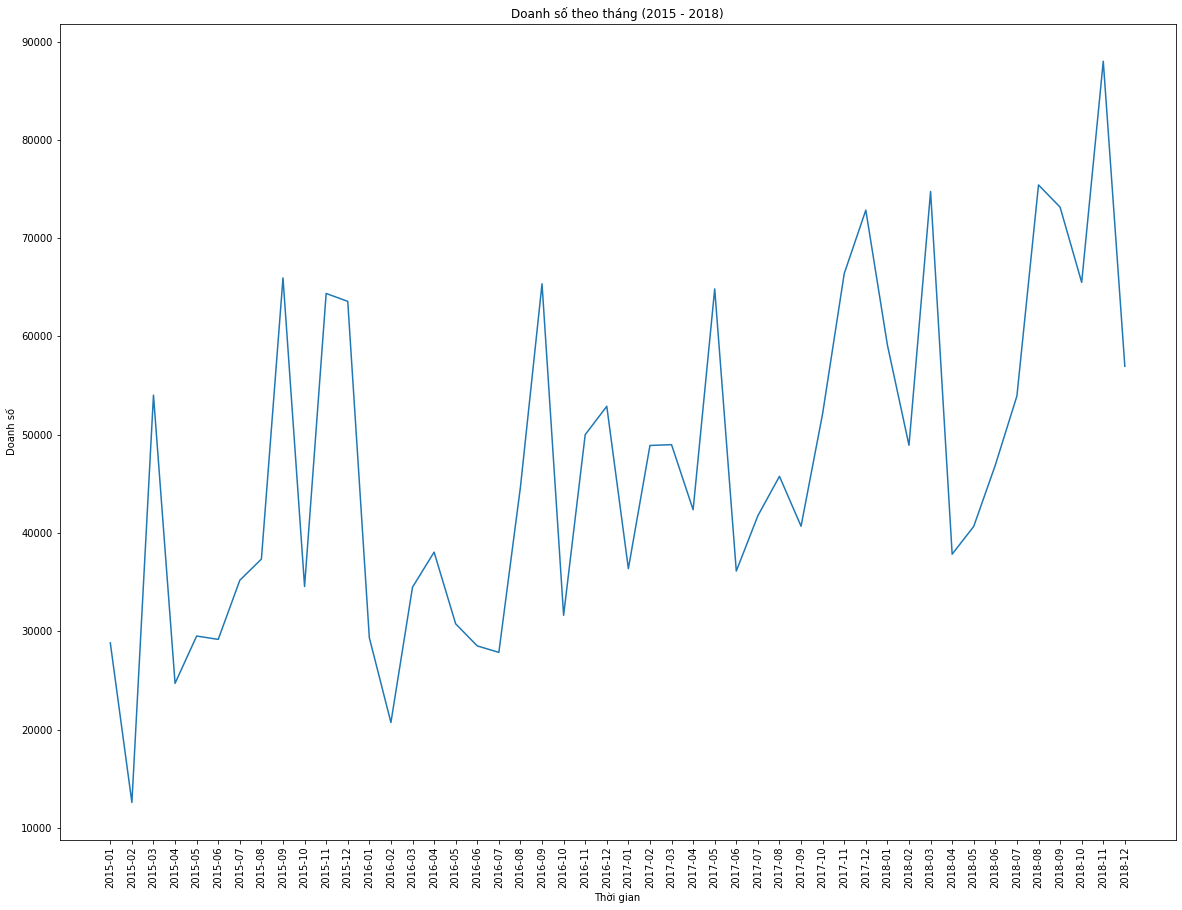

In [ ]:
plt.figure(figsize =(20,15))
plt.xticks(rotation = 'vertical', size =10)
plt.plot(sales_trend['Year Month'], sales_trend['Sales'])
plt.title('Doanh số theo tháng (2015 - 2018)')
plt.ylabel('Doanh số')
plt.xlabel('Thời gian')
plt.show()

# **Doanh thu trung bình trong 3 tháng gần nhất**

In [ ]:
sales_trend['Sales'].tail(3).mean()

70152.67933333333

# **Biểu đồ doanh số bán hàng theo quý**

In [ ]:
sales_trend.groupby('quarter')['Sales'].mean()

quarter
2015Q1    31814.810000
2015Q2    27803.946867
2015Q3    46166.741100
2015Q4    54166.571400
2016Q1    28188.472000
2016Q2    32444.811733
2016Q3    45961.045667
2016Q4    44844.305733
2017Q1    44757.868333
2017Q2    47778.076933
2017Q3    42740.354567
2017Q4    63798.863500
2018Q1    60935.789400
2018Q2    41813.159833
2018Q3    67501.641167
2018Q4    70152.679333
Freq: Q-DEC, Name: Sales, dtype: float64

Text(0.5, 0, 'Quí')

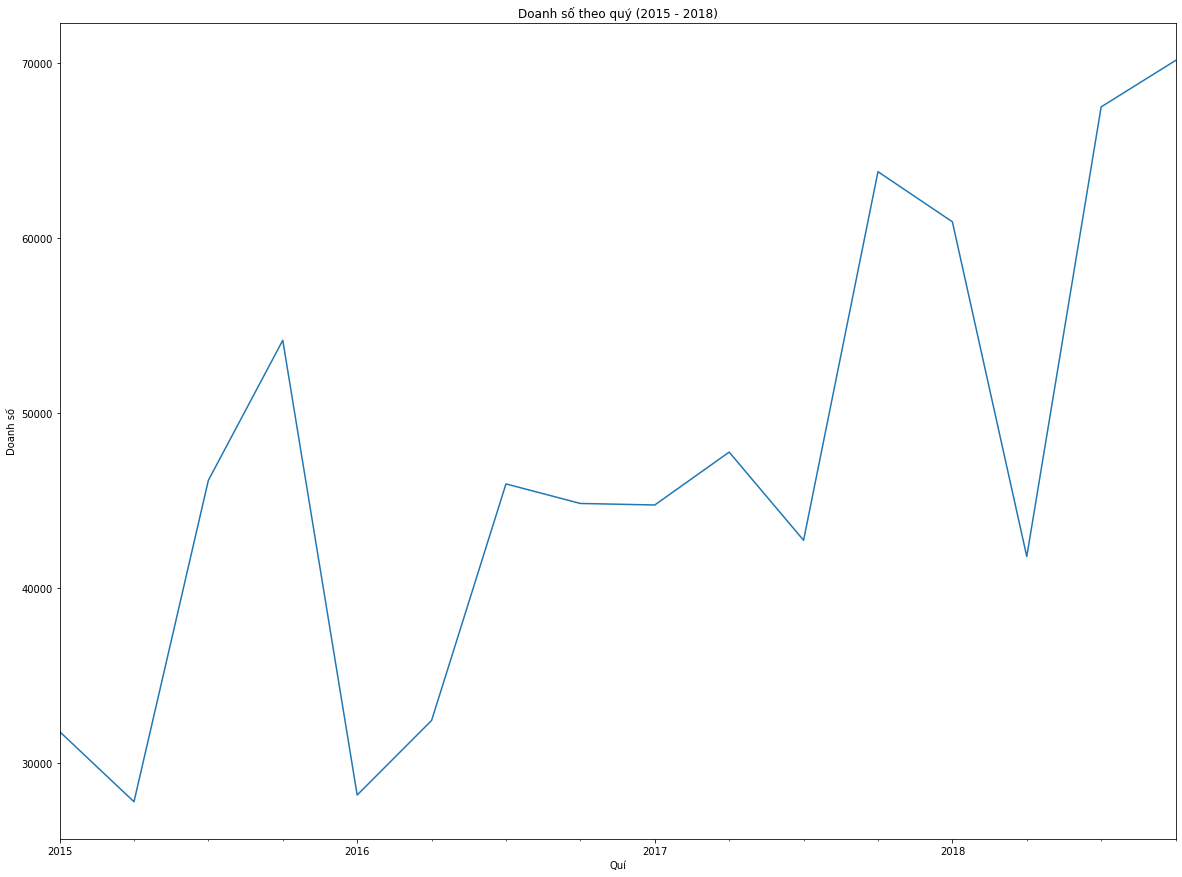

In [ ]:
plt.figure(figsize =(20,15))
sales_trend.groupby('quarter')['Sales'].mean().plot()

plt.title('Doanh số theo quý (2015 - 2018)')
plt.ylabel('Doanh số')
plt.xlabel('Quí')


# **Quý có tổng doanh số cao nhất**

In [ ]:
sales_trend_raw = sales_trend.groupby('quarter')['Sales'].mean().to_frame().reset_index()
sales_trend_raw.loc[sales_trend_raw['Sales'].idxmax()]

quarter          2018Q4
Sales      70152.679333
Name: 15, dtype: object

# **Thời gian trung giao hàng trung bình (ship date - order date) theo từng tháng và vẽ biểu đồ mô tả sự biến thiên của con số này**

In [ ]:
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year Month
0,1,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017-08
1,2,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-08
2,3,CA-2017-138688,2017-12-06,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-12
3,4,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-11
4,5,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016-11


In [ ]:
sales_raw = sales
sales_raw['Year Month'] = sales_raw['Order Date'].apply(lambda x: x.strftime('%Y-%m'))
sales_raw['raw_date'] = sales_raw['Ship Date'] - sales_raw['Order Date']

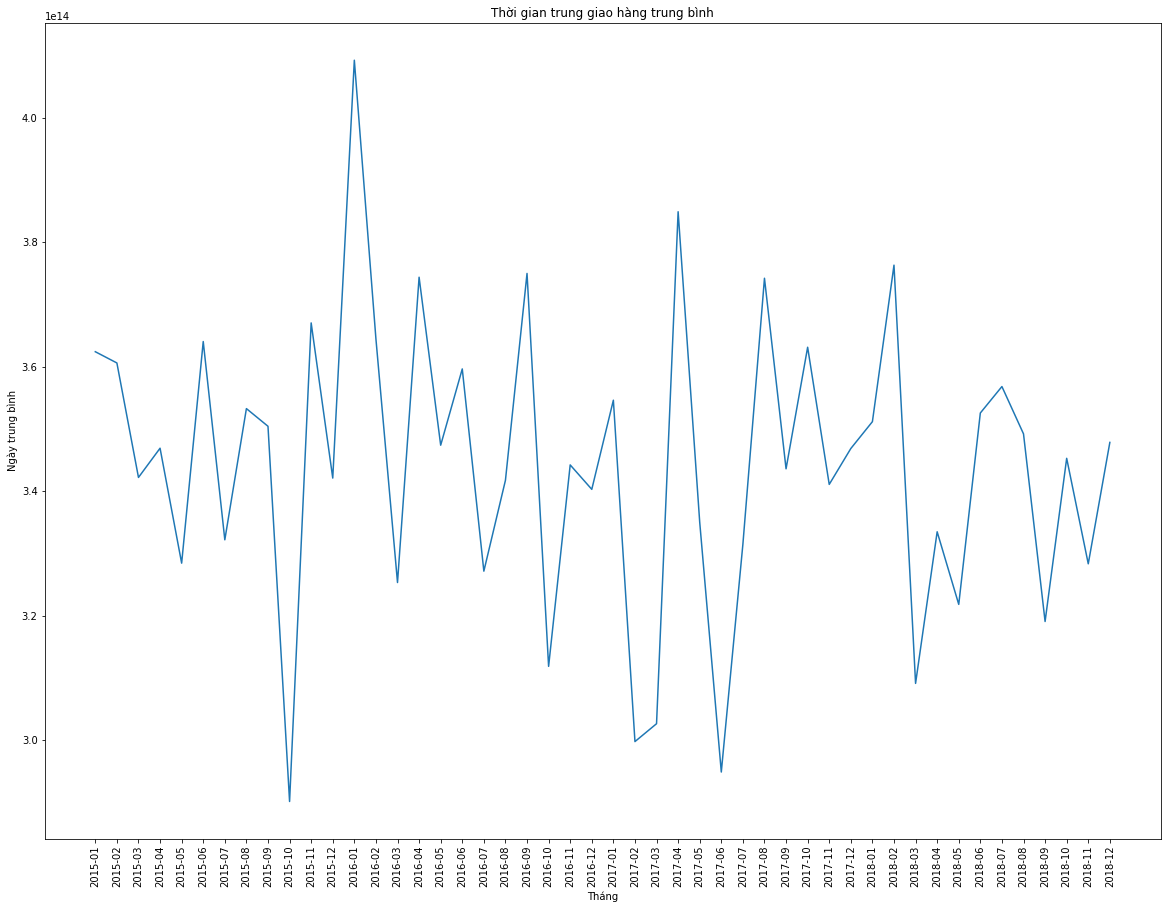

In [ ]:
plt.figure(figsize =(20,15))
plt.xticks(rotation = 'vertical', size =10)
raw_x = sales_raw.groupby('Year Month')['raw_date'].mean().to_frame().reset_index()
plt.plot(raw_x['Year Month'], raw_x['raw_date'])
plt.title('Thời gian trung giao hàng trung bình')
plt.ylabel('Ngày trung bình')
plt.xlabel('Tháng')
plt.show()

# **Biểu đồ thể hiện sức mua theo từng thành phố**

Text(0, 0.5, 'Sức mua')

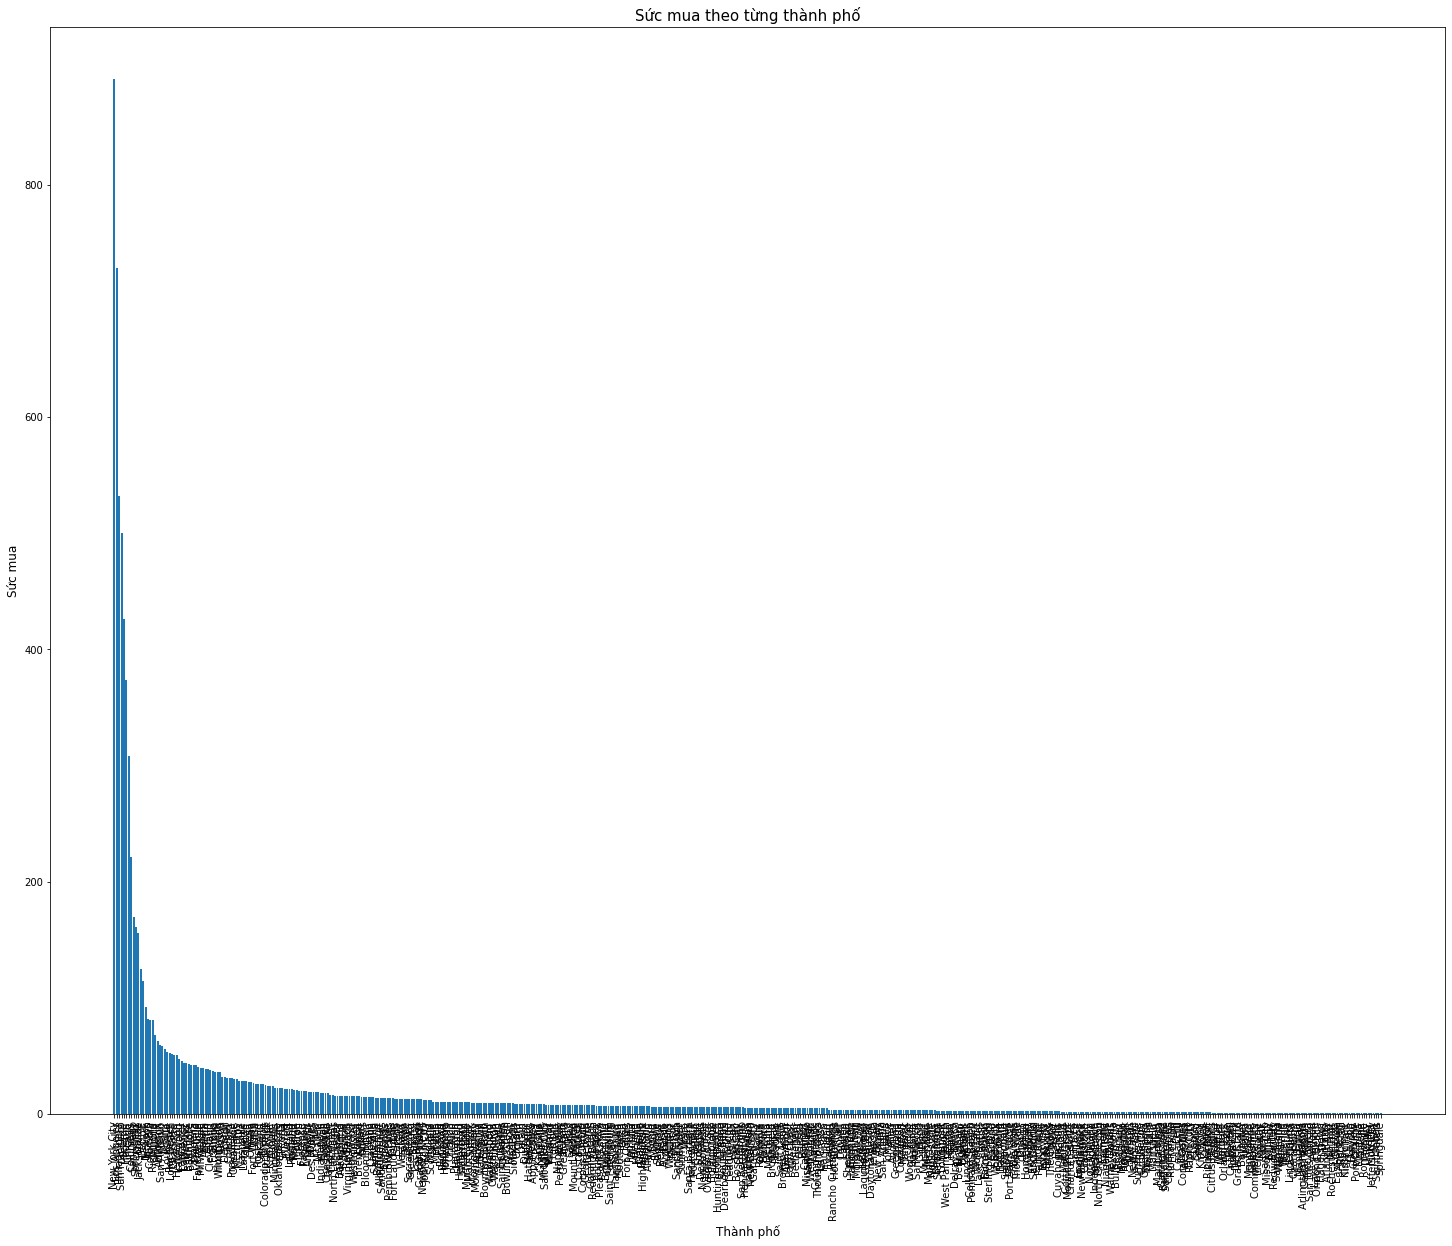

In [ ]:
x = city_count.to_frame().reset_index()
plt.figure(figsize=(25,20))
plt.bar(x['index'],x['City'])
plt.xticks(rotation='vertical')
plt.title('Sức mua theo từng thành phố',fontsize=15)
plt.xlabel('Thành phố',fontsize=12)
plt.ylabel('Sức mua',fontsize=12)

# **Top 3 thành phố có doanh số thấp nhất và 3 thành phố có doanh số cao nhất**

In [ ]:
city_count = city_count.sort_values(ascending = False)

**Top 3 thành phố có doanh số thấp nhất**

In [ ]:
city_count.tail(3)

Linden          1
Saint Peters    1
Springdale      1
Name: City, dtype: int64

**Top 3 thành phố có doanh số cao nhất**

In [ ]:
city_count.head(3)

New York City    891
Los Angeles      728
Philadelphia     532
Name: City, dtype: int64

# **Biểu đồ thể hiện tỉ trọng doanh số theo bang**

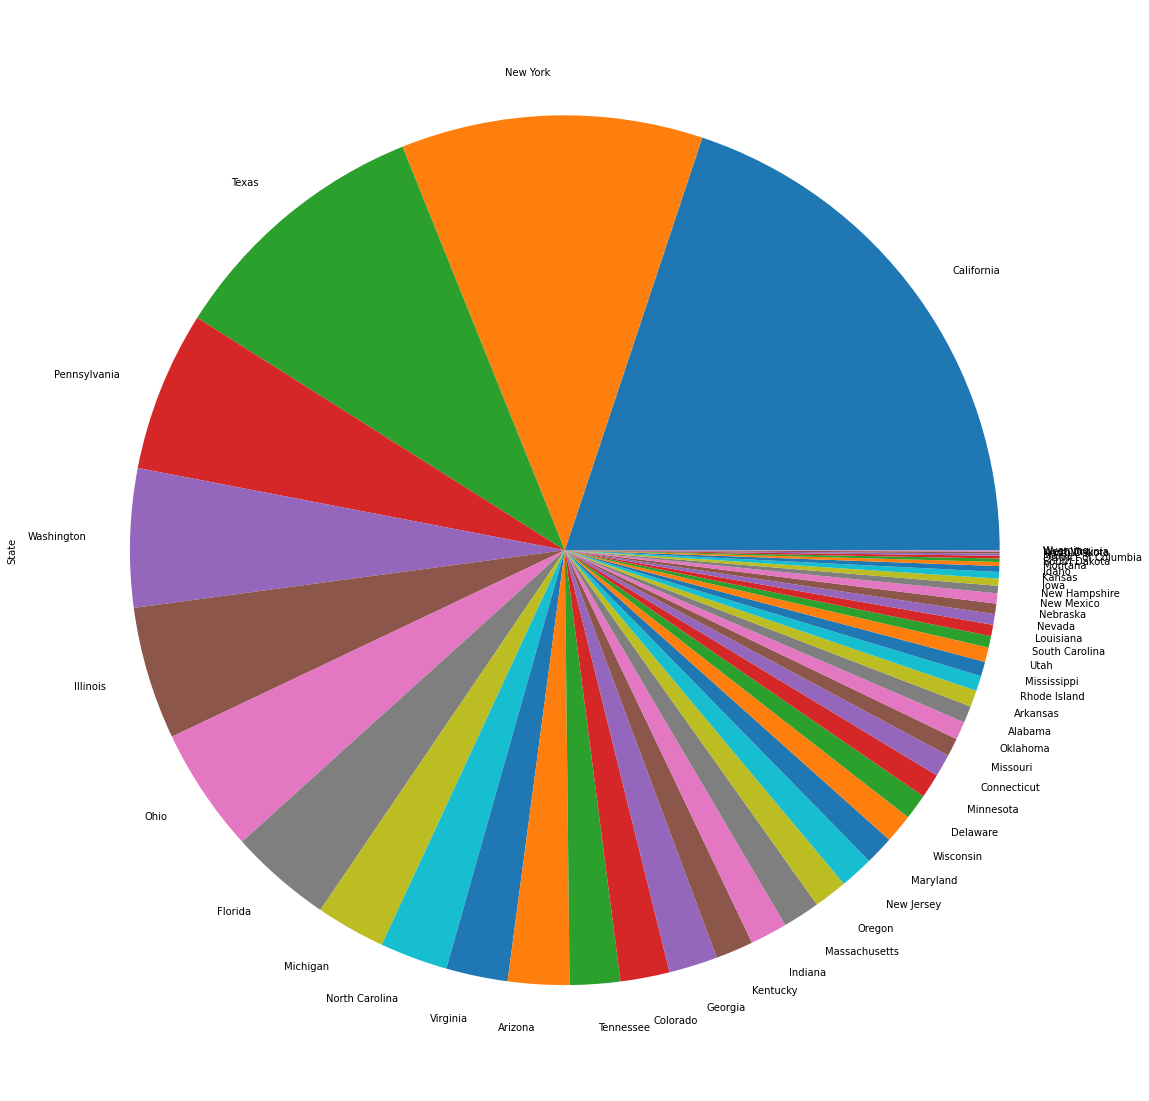

In [ ]:
plt.figure(figsize=(25,20))
state_count = sales['State'].value_counts()
state_count.plot.pie()

# **Trung bình doanh số của 5 bang dẫn đầu về sức mua**

In [ ]:
top_states=sales.groupby(['State']).sum().sort_values('State',ascending=False).head(5)
top_states=top_states[['Sales']].round(2)
top_states.reset_index(inplace=True)

In [ ]:
top_states

,State,Sales
0,Wyoming,1603.14
1,Wisconsin,31173.43
2,West Virginia,1209.82
3,Washington,135206.85
4,Virginia,70636.72


#**Các bang dẫn đầu doanh số theo từng vùng**

In [ ]:
x = sales.groupby(['State','Region'])['Sales'].sum().reset_index().set_index('Sales')
y = sales.groupby(['State','Region'])['Sales'].sum().reset_index().groupby(['Region'])['Sales'].max().reset_index().set_index('Sales')

z = x.merge(y, how='inner', 
                                            left_index=True, right_index=True, 
                                            validate="1:1")
z

,State,Region_x,Region_y
Sales,,,
446306.4635,California,West,West
88436.5320,Florida,South,South
306361.1470,New York,East,East
168572.5322,Texas,Central,Central


# **Top 3 sản phẩm có doanh thu cao nhất**

In [ ]:
x = sales.groupby(['Product Name'])['Sales'].sum().reset_index().sort_values('Sales', ascending=False)
x.head(3)

,Product Name,Sales
403,Canon imageCLASS 2200 Advanced Copier,61599.824
648,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
443,Cisco TelePresence System EX90 Videoconferenci...,22638.480


# **Top 3 sản phẩm có số lượng đơn vị bán ra cao nhất**

In [ ]:
x = sales.groupby(['Product Name'])['Product Name'].agg('count')
x.sort_values(ascending=False).head(3)

Product Name
Staple envelope      47
Staples              46
Easy-staple paper    44
Name: Product Name, dtype: int64

# **Biểu đồ thể hiện tỉ trọng doanh số của từng category**

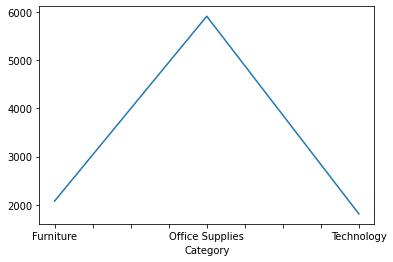

In [ ]:
cat= sales.groupby(sales['Category']).count()['Sales']
cat.plot()